In [7]:
from __future__ import print_function
import numpy as np 
import skimage.io as io
import matplotlib.pyplot as plt
import os
from scipy.ndimage import rotate
import tifffile as tiff
from patchify import patchify, unpatchify

(799, 799)


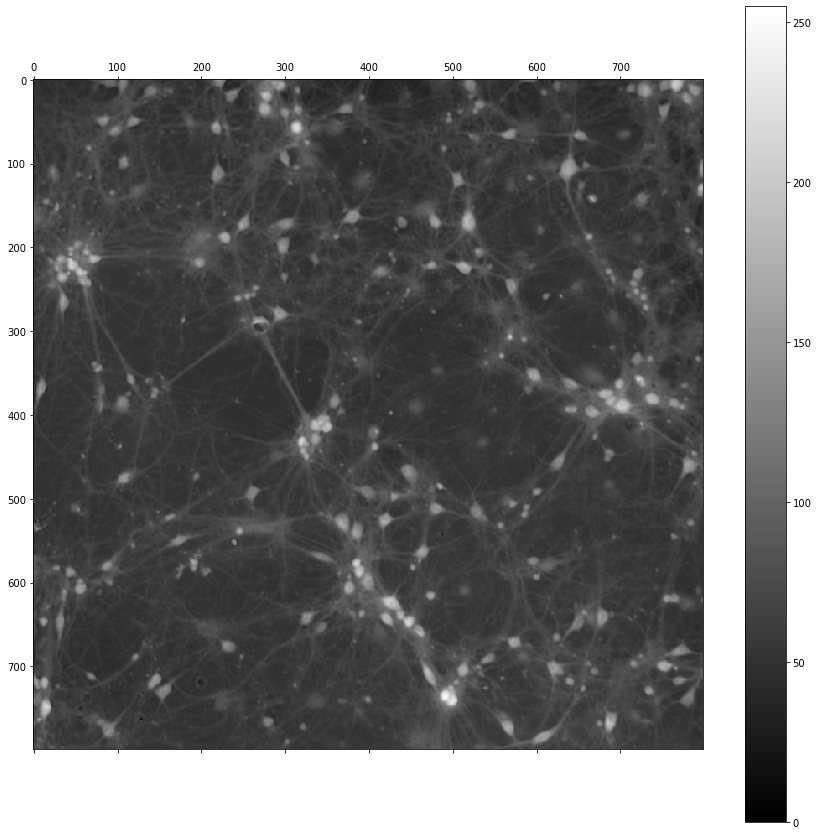

In [8]:
PDHM_img = io.imread('/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/PDHM_img/Avrg_Bw_5X_3.tif')
print(PDHM_img.shape)
plt.figure(figsize=(15,15))
plt.matshow(PDHM_img, cmap='gray', fignum=0)
plt.colorbar()
plt.show()

## Decomposing image to size 128*128

### Condition to properly recover decomposed pathe images:

`mod(main image width  - image patch_width , step_size) == 0`

In [9]:
from mod import Mod
for i in range (1,127):
    if (Mod(671,i)) == 0: # Mod(799-128,step size =61)==0
        print(i)

1
11
61


The largest step size for splitting the input image is **61**. Taking a smaller step results in more overlap between patches in the image. As a result, it is better to choose a larger value in order to reduce overlap between images.

In [10]:
patches = patchify (PDHM_img, (128,128), step=61) # split image into 12*12 small 128*128 patches.

### Visualization of patches

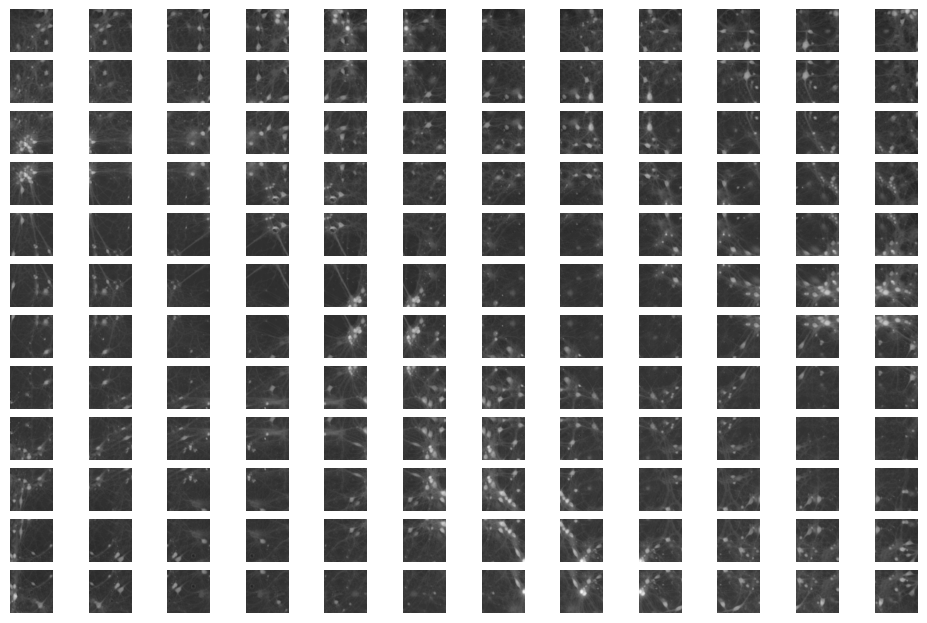

In [11]:
# Show patches in a 10x10 grid
dpi = 100
plot_width, plot_height = 1200, 800
width_inches, height_inches = plot_width/dpi, plot_height/dpi

fig, ax = plt.subplots(patches.shape[0], patches.shape[0], figsize=(width_inches, height_inches), dpi=dpi, facecolor='w', edgecolor='k', frameon=False)

for i in range(patches.shape[0]):
    for j in range(patches.shape[0]):
        im = patches[i,j,:,:]
        ax[i, j].axis('off')
        ax[i, j].imshow(im,cmap='gray', vmin = 0, vmax=255)

### Writing patches as tif images in a path

In [59]:
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        single_patch_img = patches[i,j,:,:]
        tiff.imwrite('data/patch/'+'Avrg_Bw_5X_3_'+str(i)+'_'+str(j)+".tif",single_patch_img)


In [12]:
print(type(patches))
print(np.shape(patches))

<class 'numpy.ndarray'>
(12, 12, 128, 128)


## Merge patches into original image

In [14]:
assert patches.shape == (12, 12, 128, 128)
reconstructed_image = unpatchify(patches, PDHM_img.shape)
assert (reconstructed_image == PDHM_img).all()

### Writing composed image as a tif image in a path

In [61]:
tiff.imwrite('data/unpatch/'+'Avrg_Bw_5X_3'+".tif",reconstructed_image)

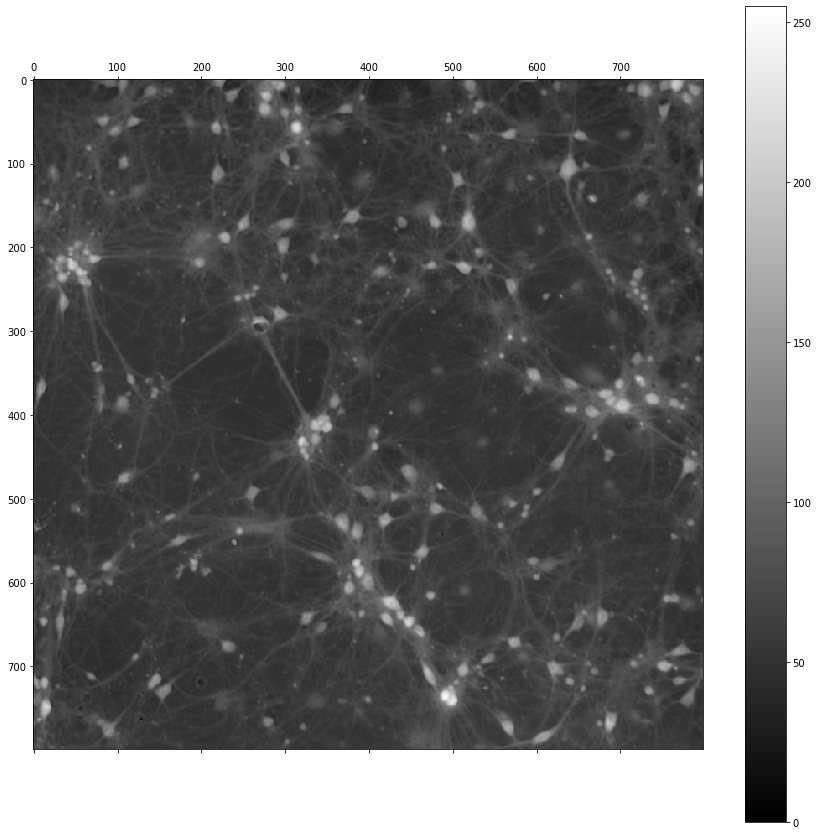

In [15]:
plt.figure(figsize=(15,15))
plt.matshow(reconstructed_image, cmap='gray', fignum=0)
plt.colorbar()
plt.show()